In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline





df = pd.read_excel(r'F:\RSI\Gold Futures Historical Data.xlsx')
df = df.iloc[::-1].reset_index(drop=True)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-01-30,1340.50,1341.30,1353.20,1340.20,1.91K,0.0002
1,2019-01-31,1350.00,1350.60,1354.60,1347.00,2.65K,0.0071
2,2019-02-01,1347.10,1349.80,1352.20,1345.90,0.75K,-0.0021
3,2019-02-04,1344.30,1346.40,1346.40,1338.00,0.53K,-0.0021
4,2019-02-05,1344.60,1343.40,1345.70,1340.80,1.25K,0.0002
...,...,...,...,...,...,...,...
262,2020-01-26,1581.95,1571.65,1588.10,1571.65,-,0.0064
263,2020-01-27,1577.40,1580.50,1588.40,1575.30,398.06K,-0.0029
264,2020-01-28,1569.80,1580.60,1582.20,1564.60,378.01K,-0.0048
265,2020-01-29,1576.70,1567.65,1577.70,1562.35,-,0.0044


In [6]:
delta = df['Price'].diff()
up, down = delta.copy(), delta.copy()

up[up < 0] = 0
down[down > 0] = 0

period = 14
    
rUp = up.ewm(com=period - 1,  adjust=False).mean()
rDown = down.ewm(com=period - 1, adjust=False).mean().abs()

df['RSI_' + str(period)] = 100 - 100 / (1 + rUp / rDown)
df['RSI_' + str(period)].fillna(0, inplace=True)


In [7]:
df

,Date,Price,Open,High,Low,Vol.,Change %,RSI_14
0,2019-01-30,1340.50,1341.30,1353.20,1340.20,1.91K,0.0002,0.000000
1,2019-01-31,1350.00,1350.60,1354.60,1347.00,2.65K,0.0071,100.000000
2,2019-02-01,1347.10,1349.80,1352.20,1345.90,0.75K,-0.0021,97.705696
3,2019-02-04,1344.30,1346.40,1346.40,1338.00,0.53K,-0.0021,95.429149
4,2019-02-05,1344.60,1343.40,1345.70,1340.80,1.25K,0.0002,95.441404
...,...,...,...,...,...,...,...,...
262,2020-01-26,1581.95,1571.65,1588.10,1571.65,-,0.0064,71.332963
263,2020-01-27,1577.40,1580.50,1588.40,1575.30,398.06K,-0.0029,67.836180
264,2020-01-28,1569.80,1580.60,1582.20,1564.60,378.01K,-0.0048,62.339173
265,2020-01-29,1576.70,1567.65,1577.70,1562.35,-,0.0044,65.103957


Text(0.5, 1.0, 'RSI INDICATOR.')

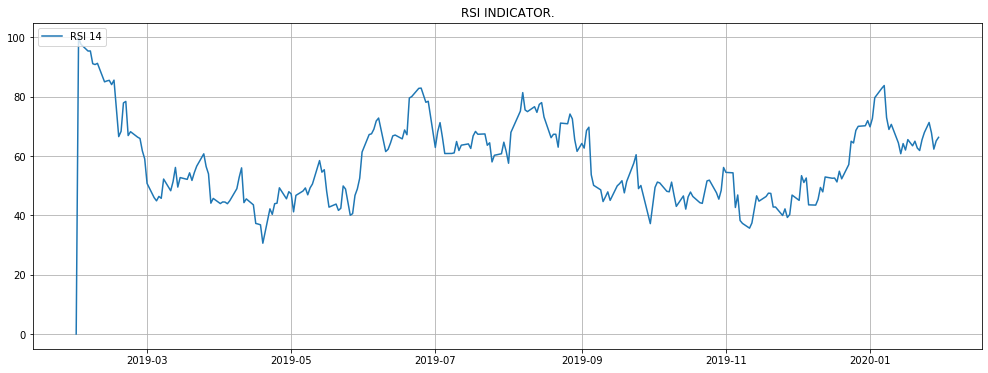

In [8]:
plt.figure(figsize=(17,6))
plt.grid(True)

plt.plot(df['Date'], df['RSI_14'], label = 'RSI 14')
plt.legend(loc=2)
plt.title('RSI INDICATOR.')